### 数据预处理
 - 数据质量：缺失值处理、异常处理、重复数据
 - 数据结构：格式转化、数据合并

### 1. 删除重复数据，并输出去重前后的数据量
### 2. 缺失值处理
- 首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
- 其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
- 最后，再次看各列有无缺失值
### 3. 数据变换，将created_at、updated_at转为时间戳
### 4. 数据可视化
- 4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

In [2]:
import pandas as pd
raw_data = pd.read_csv('github_bot_raw_data.csv') 
#列字段解读
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'gravatar_id',  # Gravatar ID (示例值: None)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]
data = raw_data[columns]

 1. 删除重复数据，并输出去重前后的数据量

In [3]:
# 删除重复数据
before_drop = len(data)
data = data.drop_duplicates()
after_drop = len(data)

# 输出去重前后的数据量
print(f"去重前的数据量: {before_drop}")
print(f"去重后的数据量: {after_drop}")

去重前的数据量: 20358
去重后的数据量: 19779


2. 缺失值处理
- 首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
- 其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
- 最后，再次看各列有无缺失值

In [4]:
# 删除 'gravatar_id' 列
data = data.drop(columns=['gravatar_id'])

# 查看各列的缺失值情况
missing_values = data.isnull().sum()
print(missing_values)

actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2589
company                 8982
blog                   11263
location                7080
email                  11739
hireable               16481
bio                    10930
twitter_username       14859
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64


In [7]:
# 将布尔类型的列转化为布尔类型（True/False）
bool_columns = ['site_admin', 'hireable']
for col in bool_columns:
    data[col] = data[col].fillna(False).astype(bool)  # 用False填充缺失值并转化为布尔类型

# 填充文本数据的缺失值为空字符串
text_columns = ['company', 'blog', 'location', 'email', 'bio', 'twitter_username', 'name']
for col in text_columns:
    data[col] = data[col].fillna('')  # 用空字符串填充缺失值

# 查看处理后的缺失值情况
missing_values_after = data.isnull().sum()
print(missing_values_after)

actor_id               0
label                  0
login                  0
id                     0
node_id                0
avatar_url             0
url                    0
html_url               0
followers_url          0
following_url          0
gists_url              0
starred_url            0
subscriptions_url      0
organizations_url      0
repos_url              0
events_url             0
received_events_url    0
type                   0
site_admin             0
name                   0
company                0
blog                   0
location               0
email                  0
hireable               0
bio                    0
twitter_username       0
public_repos           0
public_gists           0
followers              0
following              0
created_at             0
updated_at             0
dtype: int64


In [8]:
# 再次查看缺失值
missing_values_final = data.isnull().sum()
print(missing_values_final)

actor_id               0
label                  0
login                  0
id                     0
node_id                0
avatar_url             0
url                    0
html_url               0
followers_url          0
following_url          0
gists_url              0
starred_url            0
subscriptions_url      0
organizations_url      0
repos_url              0
events_url             0
received_events_url    0
type                   0
site_admin             0
name                   0
company                0
blog                   0
location               0
email                  0
hireable               0
bio                    0
twitter_username       0
public_repos           0
public_gists           0
followers              0
following              0
created_at             0
updated_at             0
dtype: int64


 3. 数据变换，将created_at、updated_at转为时间戳

In [9]:
# 将 'created_at' 和 'updated_at' 转换为 datetime 类型
data['created_at'] = pd.to_datetime(data['created_at'])
data['updated_at'] = pd.to_datetime(data['updated_at'])

# 将 'created_at' 和 'updated_at' 转换为时间戳（秒数）
data['created_at_timestamp'] = data['created_at'].astype(int) / 10**9  # 转换为秒
data['updated_at_timestamp'] = data['updated_at'].astype(int) / 10**9  # 转换为秒

# 输出转换后的数据
print(data[['created_at', 'created_at_timestamp', 'updated_at', 'updated_at_timestamp']].head())

                 created_at  created_at_timestamp                updated_at  \
0 2011-09-26 17:27:03+00:00          1.317058e+09 2023-10-13 11:21:10+00:00   
1 2015-06-29 10:12:46+00:00          1.435573e+09 2023-10-07 06:26:14+00:00   
2 2008-08-29 16:20:03+00:00          1.220027e+09 2023-10-02 02:11:21+00:00   
3 2014-05-20 18:43:09+00:00          1.400611e+09 2023-10-12 12:54:59+00:00   
4 2012-08-16 14:19:13+00:00          1.345127e+09 2023-10-06 11:58:41+00:00   

   updated_at_timestamp  
0          1.697196e+09  
1          1.696660e+09  
2          1.696213e+09  
3          1.697115e+09  
4          1.696594e+09  


4. 数据可视化
- 4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

4.1 可视化 bot 和 human 类型的情况
选择 条形图 来展示 bot 和 human 类型账号的比例。

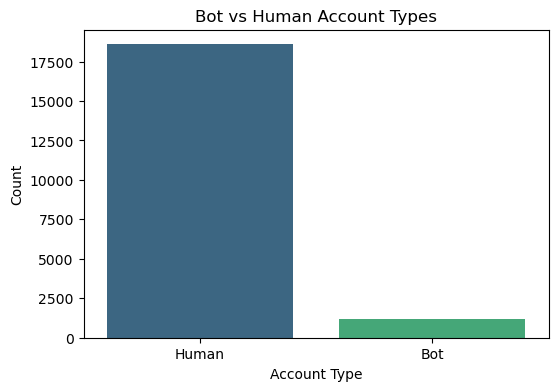

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 计算每种类型的数量
type_counts = data['label'].value_counts()

# 可视化为条形图
plt.figure(figsize=(6, 4))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')
plt.title('Bot vs Human Account Types')
plt.xlabel('Account Type')
plt.ylabel('Count')
plt.show()

说明：
选择原因：条形图可以清晰地展示每种类型的账号数量。

分析：
从条形图中可以看出，Human 类型的账号占了绝大多数，而 Bot 类型的账号只占了很小的比例。
Human 类型账号的数量接近 18000，而 Bot 类型账号的数量远远少于 2000。

数据洞察：
数据集主要以人类用户为主，Bot 类型用户只是少数。
这可能表明 GitHub 的用户主体仍是人类开发者，而 Bot 类型账户的创建可能是为了自动化任务。


4.2 可视化 bot 类型账号的 created_at 情况
选择 时间序列图 来查看 bot 类型账号的注册时间分布。

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


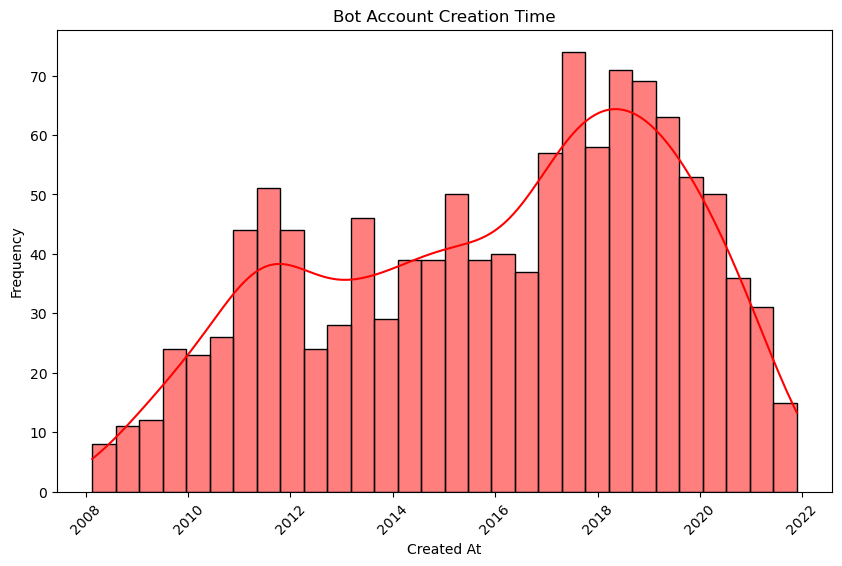

In [11]:
# 筛选出 bot 类型的账号
bot_data = data[data['label'] == 'Bot']

# 可视化 created_at 的时间分布
plt.figure(figsize=(10, 6))
sns.histplot(bot_data['created_at'], bins=30, kde=True, color='red')
plt.title('Bot Account Creation Time')
plt.xlabel('Created At')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

说明：
选择原因：时间序列图（带 KDE 的直方图）可以有效展示 bot 账号的创建时间分布。

分析：
直方图显示，Bot 类型账号的创建时间从 2008 年开始逐渐增多，在 2017 年和 2018 年达到高峰，随后有所下降。
密度曲线也表明 2015-2018 年期间，Bot 类型账号的创建量相对较高。

数据洞察：
Bot 类型账号的创建可能与自动化需求的增长有关。
在 2017-2018 年间达到高峰可能与 GitHub 平台的某些功能更新、自动化工具需求增加或开发者社区活跃度有关。
随后创建量的下降可能与 GitHub 对机器人账号的管理策略或技术发展有关。


4.3 可视化 human 类型账号的 created_at 情况
同样使用 时间序列图 来展示 human 类型账号的创建时间分布。

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


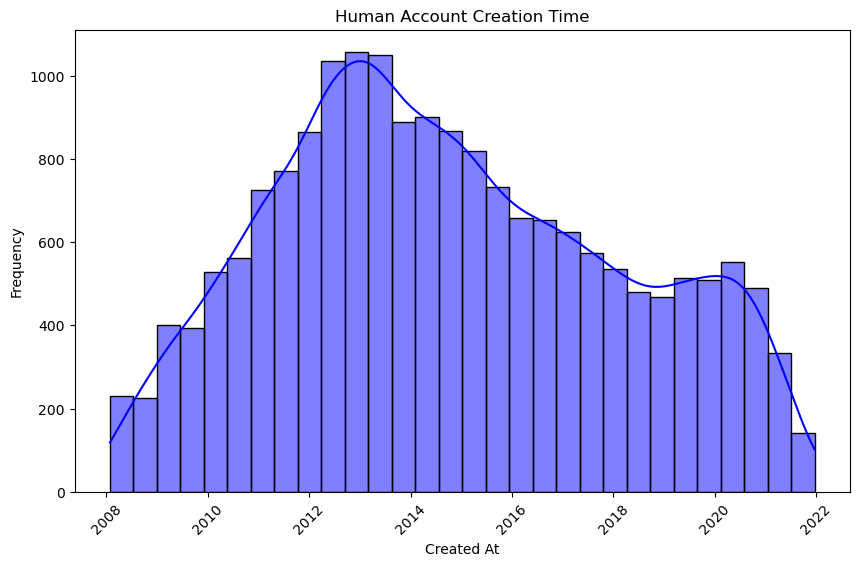

In [12]:
# 筛选出 human 类型的账号
human_data = data[data['label'] == 'Human']

# 可视化 created_at 的时间分布
plt.figure(figsize=(10, 6))
sns.histplot(human_data['created_at'], bins=30, kde=True, color='blue')
plt.title('Human Account Creation Time')
plt.xlabel('Created At')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

说明：
选择原因：同样采用时间序列图，可以直观地了解 human 账号在不同时间段的分布。

分析：
人类用户的创建时间分布较广，从 2008 年开始逐步增长，2012-2014 年达到高峰。
之后的创建量开始缓慢下降，但在 2020 年出现小幅上升。

数据洞察：
2012-2014 年间，人类用户的创建量增加可能与 GitHub 的普及和开发者社区的快速增长有关。
2020 年的上升可能与 COVID-19 大流行期间远程工作和开源社区活动增加有关。
总体而言，GitHub 的人类用户增长经历了快速普及的高峰期后趋于稳定。

4.4 可视化 bot 类型账号的 followers 和 following 情况
选择 散点图 来展示 bot 类型账号的粉丝和关注者之间的关系。

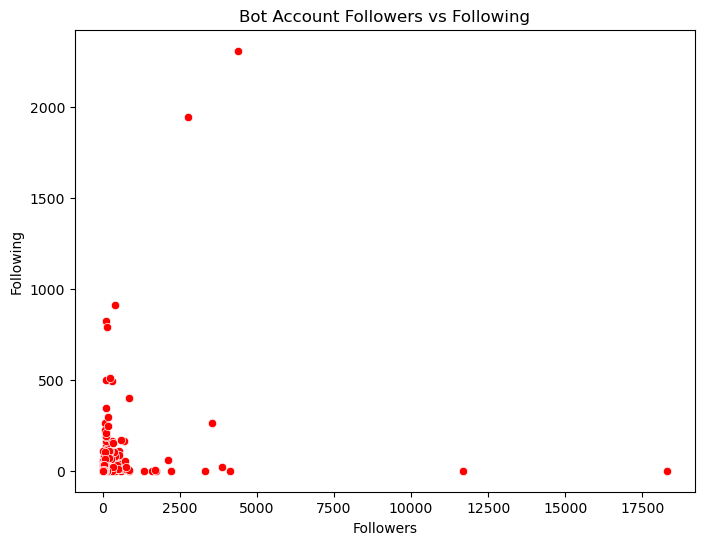

In [13]:
# 可视化 bot 类型账号的 followers 和 following
plt.figure(figsize=(8, 6))
sns.scatterplot(x=bot_data['followers'], y=bot_data['following'], color='red')
plt.title('Bot Account Followers vs Following')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.show()

说明：
选择原因：散点图可以清晰展示 bot 类型账号的粉丝数与关注者数的关系。

分析：
散点图显示大多数 Bot 类型账号的 followers 和 following 数量较低，分布集中在左下角区域。
少数 Bot 类型账号拥有较高的 following 数，但几乎没有拥有极高的 followers 数。

数据洞察：
Bot 类型账号通常用来执行特定任务，因此关注者较少，而被大量使用的 Bot 可能会关注多个其他用户或仓库。
一些异常点（如关注数超过 2000 或 10000）可能是广泛使用的自动化工具机器人。


4.5 可视化 human 类型账号的 followers 和 following 情况
使用 散点图 来查看 human 类型账号的社交行为。

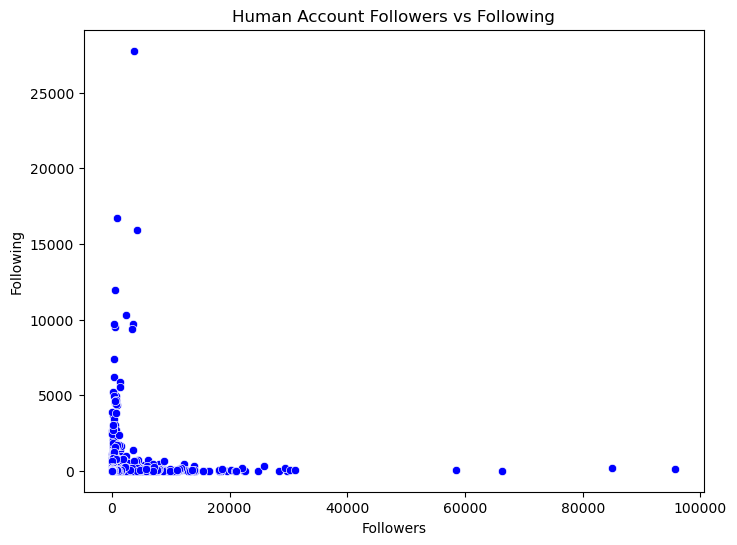

In [14]:
# 可视化 human 类型账号的 followers 和 following
plt.figure(figsize=(8, 6))
sns.scatterplot(x=human_data['followers'], y=human_data['following'], color='blue')
plt.title('Human Account Followers vs Following')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.show()

说明：
选择原因：散点图能够显示出 human 类型账号在粉丝数和关注者数上的分布情况。

分析：
散点图显示大部分 Human 类型账号的 followers 和 following 数量集中在较低值（接近于零）。
但也存在一些高 followers 和高 following 的异常值，尤其是 followers 数接近 10 万的账户。

数据洞察：
普通开发者用户的关注与被关注数较低，反映了个体开发者的行为模式。
一些用户有极高的 followers 数，可能是知名开发者、开源社区的领导者或企业账号。
Human 类型用户的关注模式比 Bot 类型更加多样化，显示了更复杂的社交关系。
